In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# Clustermap Example

This notebook demonstrates how to create clustermaps using Seaborn's `clustermap` function. Clustermaps are heatmaps with hierarchical clustering applied to both rows and columns, helping to identify patterns and similarities in the data.

In [2]:
# Load the tips dataset from seaborn
df = sns.load_dataset("tips")

# Display the first few rows of the dataset to understand its structure
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Creating a Correlation Matrix

Before creating a clustermap, we need to prepare the data. A common use case for clustermaps is to visualize correlation matrices with hierarchical clustering. Let's create a correlation matrix for the numerical columns in our dataset.

In [3]:
# Create a correlation matrix for the numerical columns
corr = df.corr(numeric_only=True)

# Display the correlation matrix
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


## Creating a Basic Clustermap

The `clustermap` function in Seaborn creates a clustered heatmap with the following key parameters:

- `data`: The matrix data to plot (e.g., a correlation matrix)
- `method`: The linkage method to use for clustering ('single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward')
- `metric`: The distance metric to use for clustering ('euclidean', 'correlation', 'cosine', etc.)
- `standard_scale`: Standardize the data along rows (0), columns (1), or both (None)
- `z_score`: Normalize the data along rows (0), columns (1), or both (None)
- `figsize`: Size of the figure

Below, we'll create a basic clustermap of the correlation matrix.

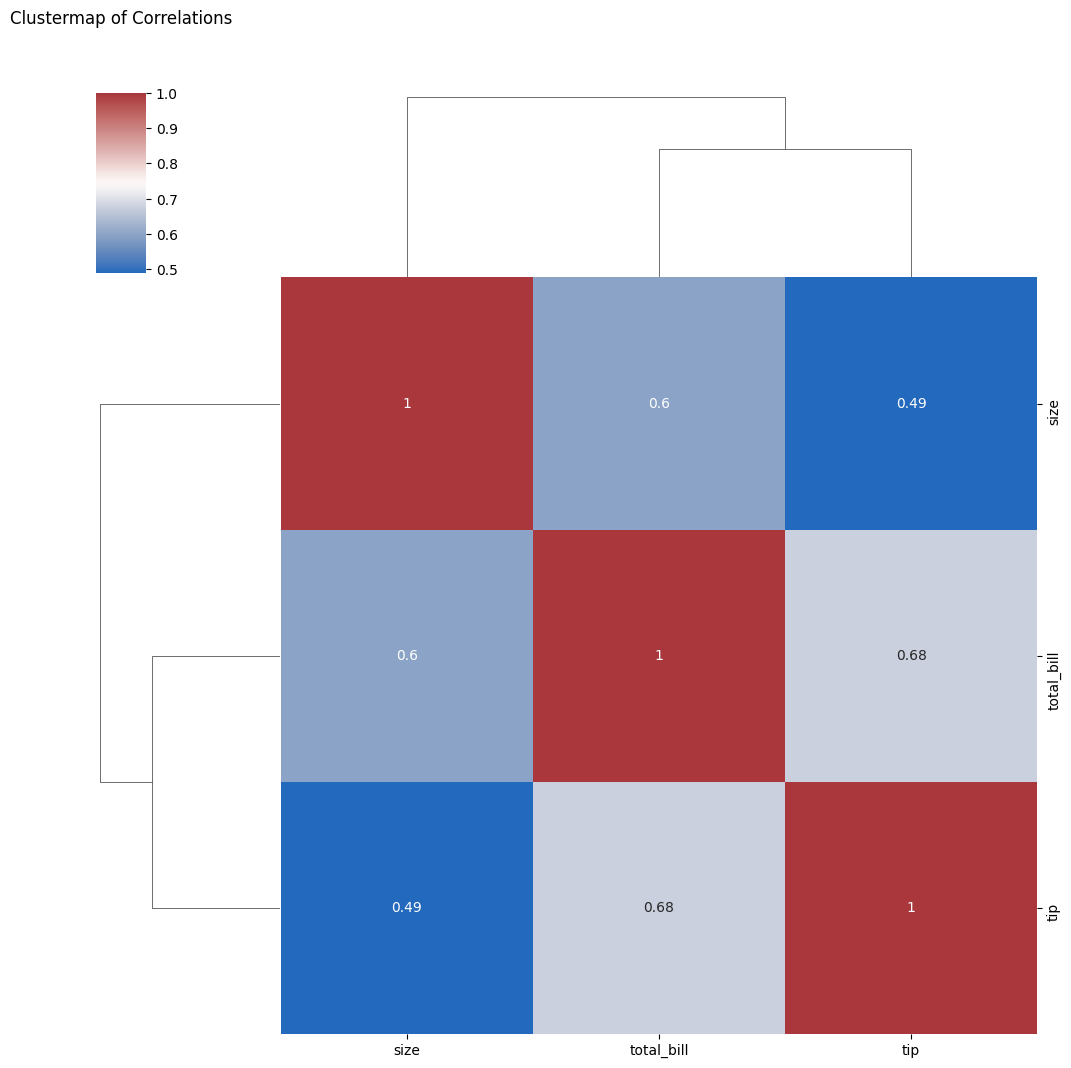

In [4]:
# Create a basic clustermap of the correlation matrix
sns.clustermap(corr, annot=True, cmap="vlag")
plt.title("Clustermap of Correlations", pad=50)  # Add padding to avoid overlap with dendrogram
plt.show()

## Linkage Methods

The linkage method determines how the distance between clusters is calculated. Different linkage methods can lead to different clustering results. Let's compare some common linkage methods.

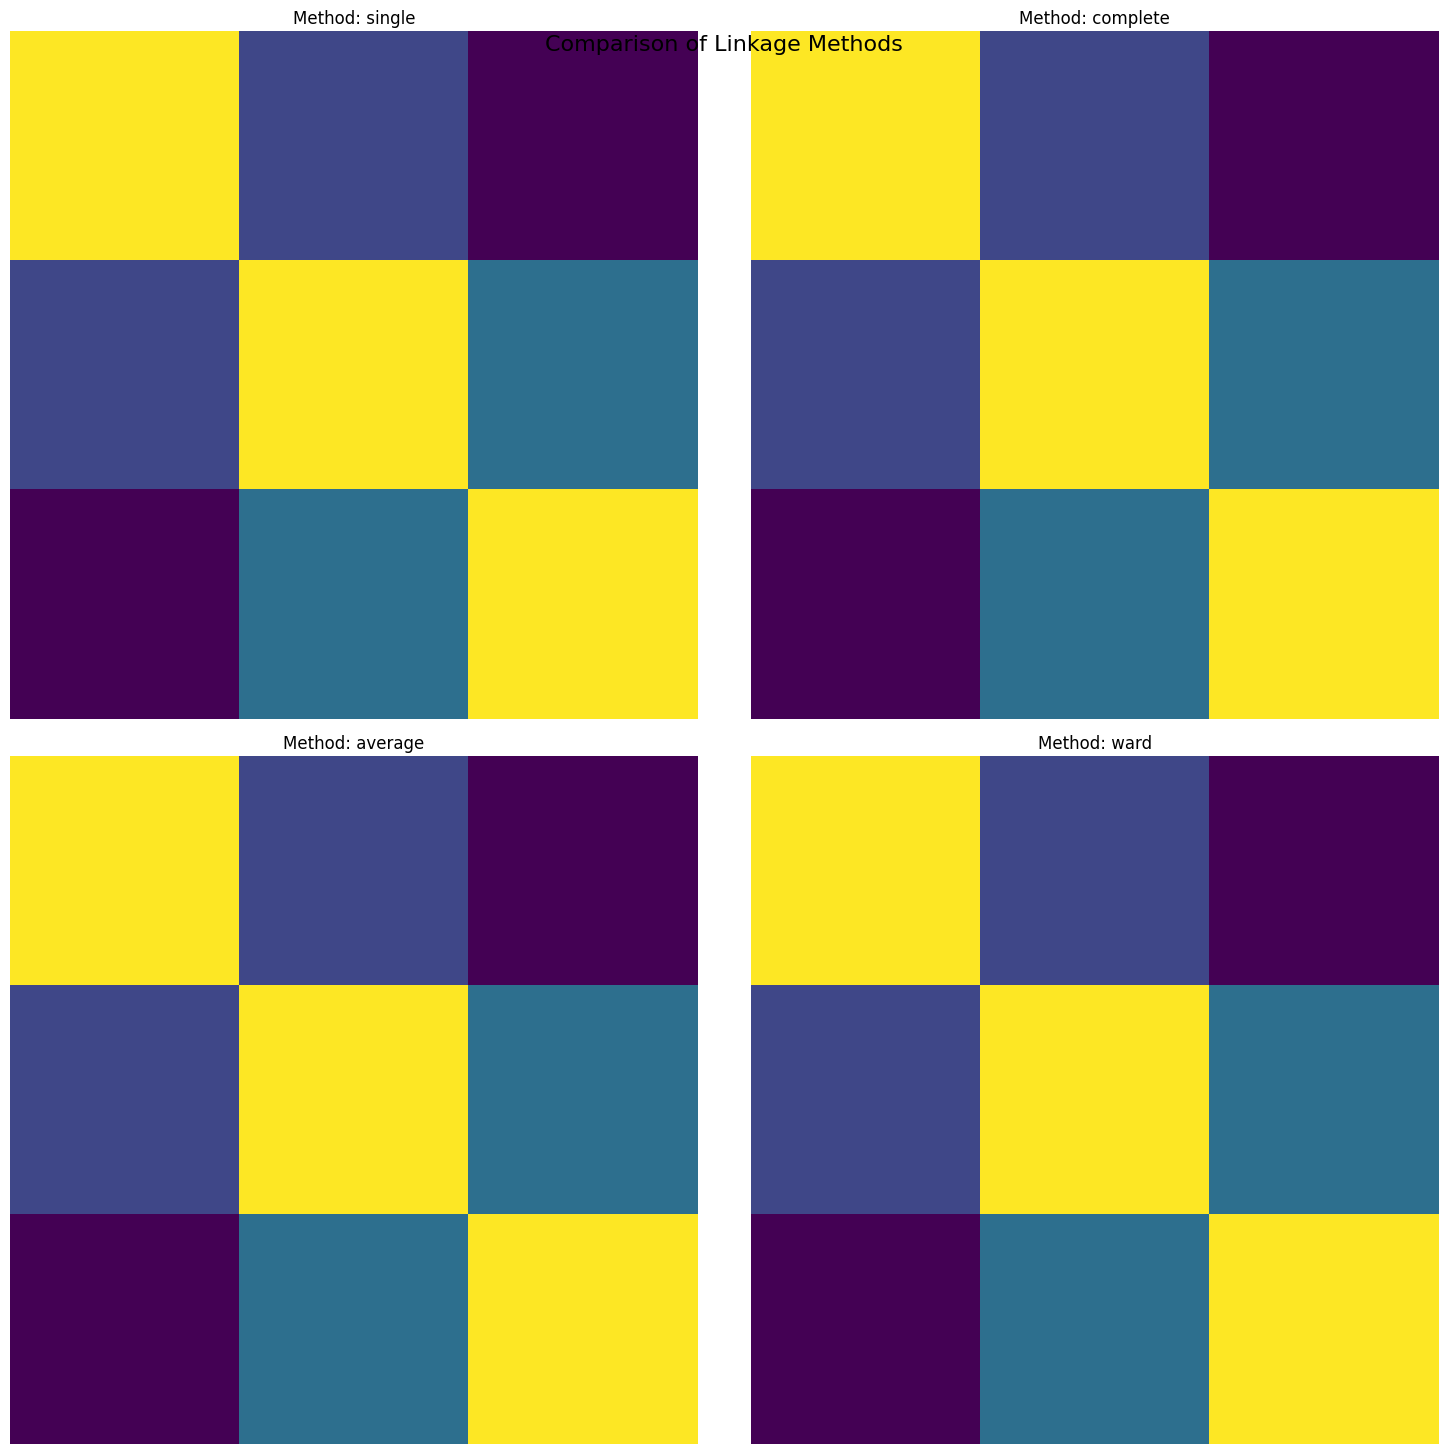

In [5]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()

# Different linkage methods
methods = ['single', 'complete', 'average', 'ward']

for i, method in enumerate(methods):
    g = sns.clustermap(
        corr, 
        method=method,  # Linkage method
        annot=True,  # Show values in cells
        cmap="vlag",  # Use the vlag colormap
        figsize=(6, 6)  # Figure size
    )
    plt.close()  # Close the figure to avoid displaying it
    
    # Add the clustermap to the subplot
    axes[i].imshow(g.data2d)
    axes[i].set_title(f"Method: {method}")
    axes[i].axis('off')  # Hide axes

plt.suptitle("Comparison of Linkage Methods", fontsize=16, y=0.95)
plt.tight_layout()
plt.show()

## Additional Customization Options

Seaborn's clustermap function offers many customization options:

- `annot`: Whether to annotate cells with the numeric value (True/False)
- `fmt`: Format string for annotations
- `cmap`: The colormap to use
- `center`: The value at which to center the colormap
- `row_cluster`, `col_cluster`: Whether to cluster rows/columns (True/False)
- `dendrogram_ratio`: Proportion of the figure size devoted to the dendrograms
- `colors_ratio`: Proportion of the figure size devoted to the colors
- `cbar_pos`: Position of the colorbar

Let's create a more customized clustermap.

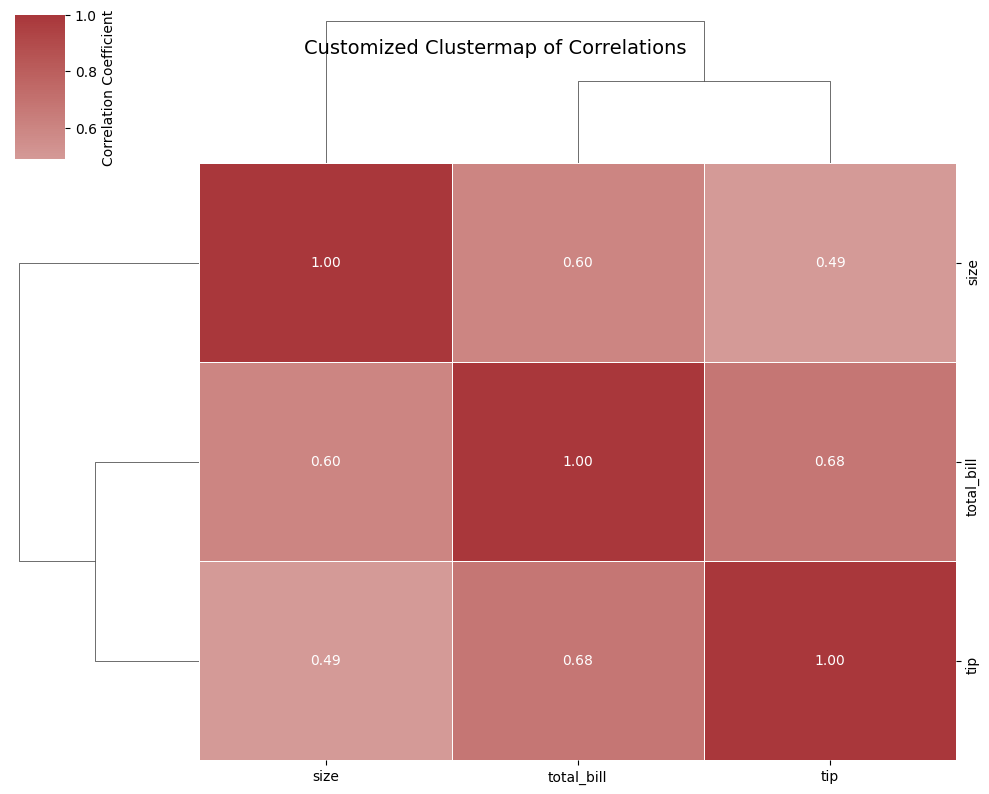

In [6]:
# Create a customized clustermap
sns.clustermap(
    corr, 
    method="average",  # Use average linkage
    metric="correlation",  # Use correlation as the distance metric
    annot=True,  # Show values in cells
    fmt=".2f",  # Format annotations to 2 decimal places
    cmap="vlag",  # Use the vlag colormap
    center=0,  # Center the colormap at 0
    linewidths=0.5,  # Add lines between cells
    figsize=(10, 8),  # Figure size
    dendrogram_ratio=(0.2, 0.2),  # Proportion of figure devoted to dendrograms
    cbar_pos=(0.02, 0.8, 0.05, 0.18),  # Position of the colorbar
    cbar_kws={"label": "Correlation Coefficient"}  # Customize colorbar
)

plt.suptitle("Customized Clustermap of Correlations", fontsize=14, y=0.95)
plt.show()

## Other Examples of Clustermaps

Clustermaps can be used for various types of data, not just correlation matrices. Let's explore some other examples.

### Flights Dataset Example

Let's use the flights dataset, which contains information about passenger numbers for different months and years, to create a clustermap.

In [7]:
# Load the flights dataset
flights = sns.load_dataset("flights")

# Display the first few rows
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [8]:
# Pivot the flights data to create a year x month matrix
flights_pivot = flights.pivot(index="month", columns="year", values="passengers")

# Display the pivot table
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


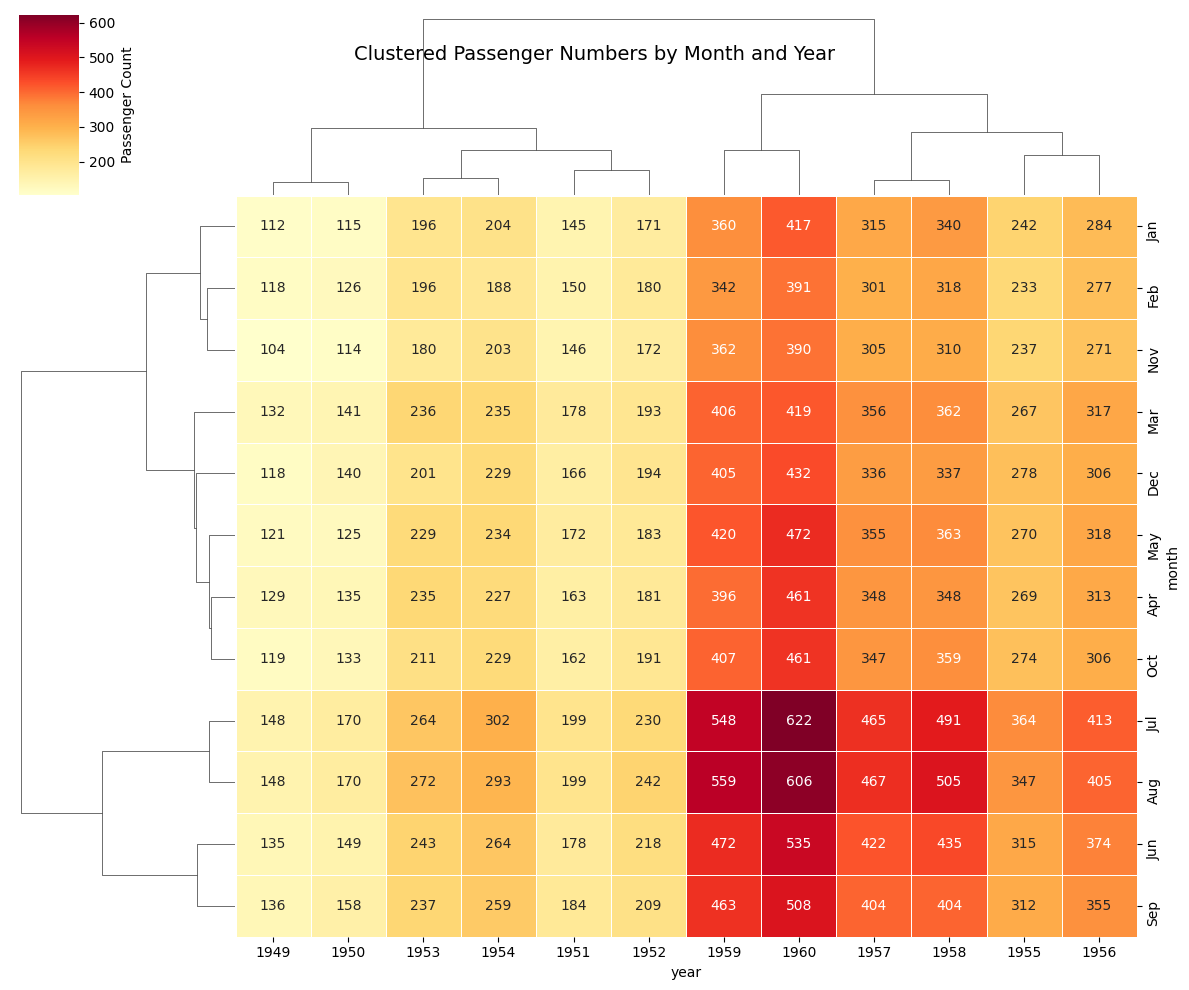

In [9]:
# Create a clustermap of passenger numbers by month and year
sns.clustermap(
    flights_pivot, 
    annot=True,  # Show values in cells
    fmt="d",  # Format annotations as integers
    cmap="YlOrRd",  # Use the YlOrRd colormap
    figsize=(12, 10),  # Figure size
    linewidths=0.5,  # Add lines between cells
    cbar_kws={"label": "Passenger Count"}  # Customize colorbar
)

plt.suptitle("Clustered Passenger Numbers by Month and Year", fontsize=14, y=0.95)
plt.show()

### Iris Dataset Example

Let's use the iris dataset, which contains measurements of iris flowers, to create a clustermap with row standardization.

In [10]:
# Load the iris dataset
iris = sns.load_dataset("iris")

# Display the first few rows
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


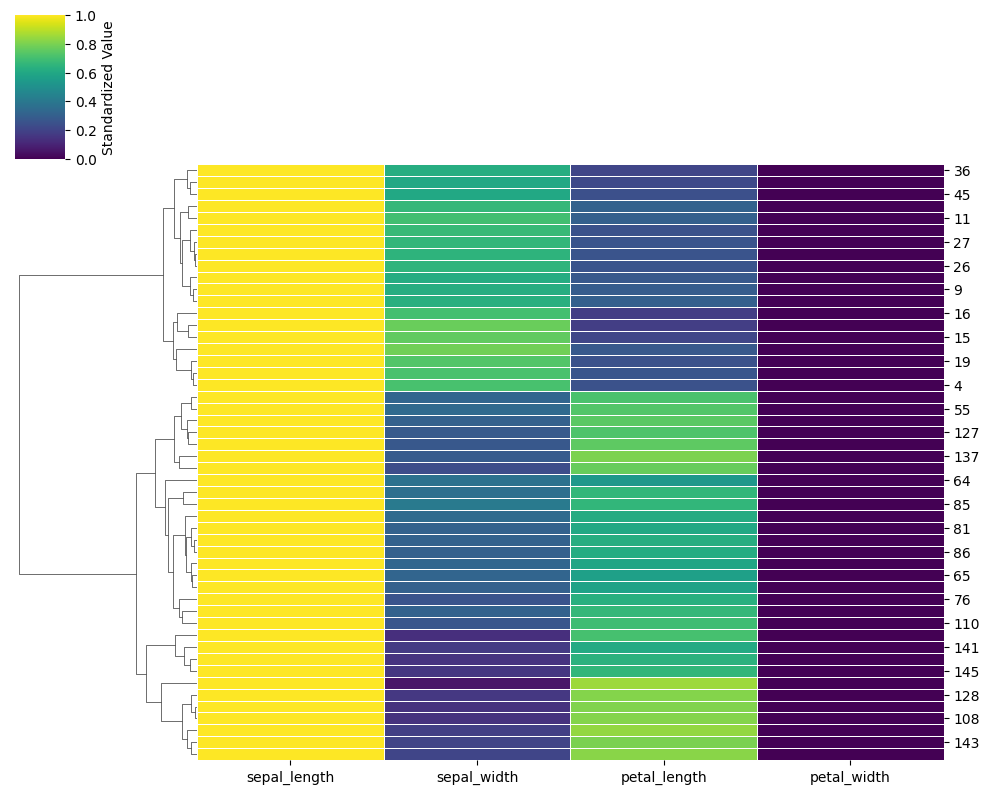

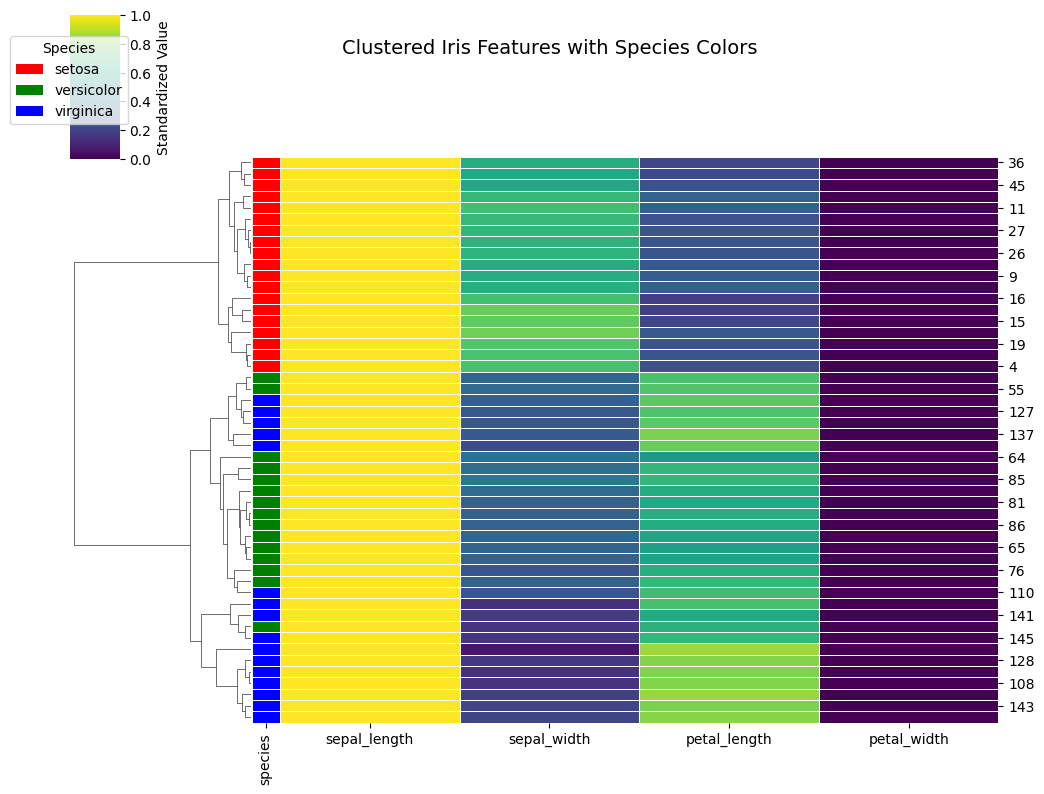

In [11]:
# Create a clustermap of the iris dataset with row standardization
# We'll use only the numerical columns and a sample of 50 rows for clarity
iris_sample = iris.sample(50, random_state=42)
iris_features = iris_sample.drop("species", axis=1)

# Create a clustermap with row standardization
g = sns.clustermap(
    iris_features, 
    standard_scale=0,  # Standardize rows (features)
    cmap="viridis",  # Use the viridis colormap
    figsize=(10, 8),  # Figure size
    linewidths=0.5,  # Add lines between cells
    col_cluster=False,  # Don't cluster columns
    cbar_kws={"label": "Standardized Value"}  # Customize colorbar
)

# Add species information as row colors
species_colors = {"setosa": "red", "versicolor": "green", "virginica": "blue"}
row_colors = iris_sample["species"].map(species_colors)

# Create a new clustermap with row colors
sns.clustermap(
    iris_features, 
    standard_scale=0,  # Standardize rows (features)
    row_colors=row_colors,  # Add row colors based on species
    cmap="viridis",  # Use the viridis colormap
    figsize=(10, 8),  # Figure size
    linewidths=0.5,  # Add lines between cells
    col_cluster=False,  # Don't cluster columns
    cbar_kws={"label": "Standardized Value"}  # Customize colorbar
)

# Add a legend for the species colors
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=species) for species, color in species_colors.items()]
plt.legend(handles=legend_elements, title="Species", loc="upper right", bbox_to_anchor=(1.3, 0.9))

plt.suptitle("Clustered Iris Features with Species Colors", fontsize=14, y=0.95)
plt.show()